# Курсовая работа № 2
## Аналитика. Начальный уровень

Курсовая работа состоит из двух частей – обязательной и дополнительной. **Для зачета необходимо выполнение только первой части.** Выполнение второй части может потребовать дополнительные знания Python.

- [Часть первая](#Часть-первая)
- [Часть вторая](#Часть-вторая)

## Часть первая


Перед вами стоит задача – подготовить аналитический отчет для HR-отдела. На основании проведенной аналитики предполагается составить рекомендации для отдела кадров по стратегии набора персонала, а также по взаимодействию с уже имеющимися сотрудниками.
<br><br> В базе данных лежит набор таблиц, которые содержат данные о сотрудниках вымышленной компании.
Сделайте обзор штата сотрудников компании. Составьте набор предметов исследования, а затем проверьте их на данных. Вся аналитика должна быть выполена с помощью SQL. Впоследствии данные можно визуализировать, однако финальные датафреймы для графиков также должны быть подготовлены с помощью SQL. <br><br>

Примеры гипотез:
1. Есть зависимость между `perfomance score` и тем, под чьим руководством работает сотрудник.
2. Есть зависимость между продолжительностью работы в компании и семейным положением сотрудника.
2. Есть зависимость между продолжительностью работы в компании и возрастом сотрудника.

<br><br>
Параметры для подключения следующие: хост – `dsstudents.skillbox.ru`, порт – `5432`, имя базы данных – `human_resources`, пользователь – `readonly`, пароль – `6hajV34RTQfmxhS`. Таблицы, доступные для анализа, – `hr_dataset`, `production_staff`, `recruiting_costs`, `salary_grid`.

In [18]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import f_oneway

In [19]:
# Параметры подключения
host = "dsstudents.skillbox.ru"
port = 5433
database = "human_resources"
user = "readonly"
password = "6hajV34RTQfmxhS"

# Устанавливаем соединение с базой данных
conn = psycopg2.connect(host=host, port=port, database=database, user=user, password=password)

# Выполняем SQL-запрос для выгрузки данных
hr_dataset = "SELECT * FROM hr_dataset"
production_staff = "SELECT * FROM production_staff"
recruiting_costs = "SELECT * FROM recruiting_costs"
salary_grid = "SELECT * FROM salary_grid"

df_hr_dataset = pd.read_sql_query(hr_dataset, conn)
df_production_staff = pd.read_sql_query(production_staff, conn)
df_recruiting_costs = pd.read_sql_query(recruiting_costs, conn)
df_salary_grid = pd.read_sql_query(salary_grid, conn)

# Гипотеза 1: Есть зависимость между perfomance score и тем, под чьим руководством работает сотрудник.
sql_query = """
SELECT "Manager Name", AVG(perf_scoreid) AS Avg_Performance_Score
FROM hr_dataset
GROUP BY "Manager Name"
"""
df_manager_performance = pd.read_sql_query(sql_query, conn)

# Гипотеза 2: Есть зависимость между продолжительностью работы в компании и семейным положением сотрудника.
sql_query = """
SELECT maritaldesc, AVG("Days Employed") AS Avg_Days_Employed
FROM hr_dataset
GROUP BY maritaldesc
"""
df_marital_employment = pd.read_sql_query(sql_query, conn)

# Гипотеза 3: Есть зависимость между продолжительностью работы в компании и возрастом сотрудника.
sql_query = """
SELECT age, AVG("Days Employed") AS Avg_Days_Employed
FROM hr_dataset
GROUP BY age
"""
df_age_employment = pd.read_sql_query(sql_query, conn)

D:\Anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
D:\Anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
D:\Anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
D:\Anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not te

In [20]:
# Гипотеза 1: Есть зависимость между perfomance score и тем, под чьим руководством работает сотрудник.

In [21]:
df_manager_performance

,Manager Name,avg_performance_score
0,Brian Champaigne,3.000000
1,Michael Albert,4.363636
2,Simon Roup,3.764706
3,John Smith,2.571429
4,Amy Dunn,4.380952
5,Brannon Miller,2.857143
6,Webster Butler,3.428571
7,Brandon R. LeBlanc,4.285714
8,Janet King,3.157895
9,Lynn Daneault,3.230769


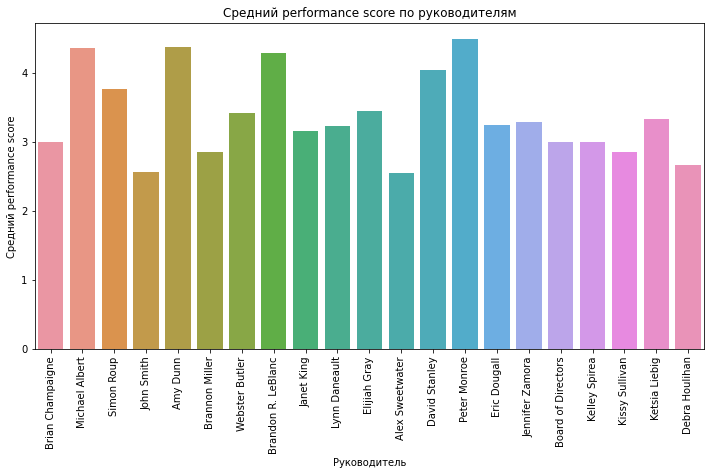

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Manager Name', y='avg_performance_score', data=df_manager_performance)
plt.xticks(rotation=90)
plt.title('Средний performance score по руководителям')
plt.xlabel('Руководитель')
plt.ylabel('Средний performance score')
plt.show()

In [23]:
grouped_data = [df_manager_performance[df_manager_performance['Manager Name'] == manager]['avg_performance_score'] for manager in df_manager_performance['Manager Name']]

f_statistic, p_value = f_oneway(*grouped_data)

if p_value < 0.05:
    print("Существует статистически значимая разница между средними performance score руководителей.")
else:
    print("Нет статистически значимой разницы между средними performance score руководителей.")

Нет статистически значимой разницы между средними performance score руководителей.


D:\Anaconda\lib\site-packages\scipy\stats\stats.py:3629: F_onewayBadInputSizesWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(F_onewayBadInputSizesWarning(msg))


In [24]:
# Гипотеза 2: Есть зависимость между продолжительностью работы в компании и семейным положением сотрудника.

In [25]:
df_marital_employment

,maritaldesc,avg_days_employed
0,Widowed,863.000000
1,Married,1246.235772
2,Separated,1703.416667
3,Single,1372.751825
4,Divorced,1102.866667


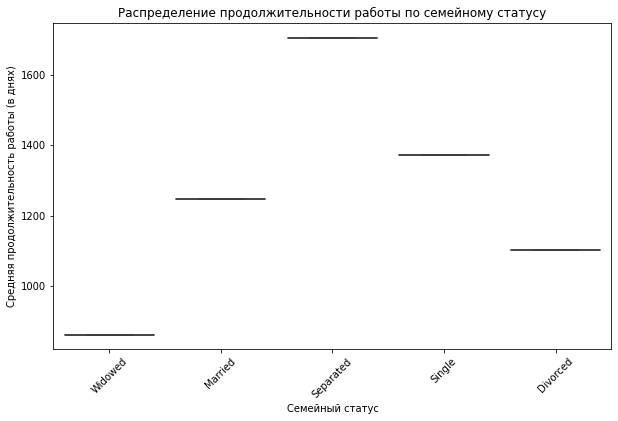

In [26]:
data = df_marital_employment

plt.figure(figsize=(10, 6))
sns.boxplot(x='maritaldesc', y='avg_days_employed', data=data)
plt.title('Распределение продолжительности работы по семейному статусу')
plt.xticks(rotation=45)
plt.xlabel('Семейный статус')
plt.ylabel('Средняя продолжительность работы (в днях)')
plt.show()

In [27]:
data = df_marital_employment

groups = []
for marital_status, group_data in data.groupby('maritaldesc'):
    groups.append(group_data['avg_days_employed'])

f_statistic, p_value = f_oneway(*groups)

alpha = 0.05
print(f'Статистика F: {f_statistic}')
print(f'p-значение: {p_value}')

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: Семейное положение оказывает статистически значимое влияние на продолжительность работы.')
else:
    print('Не отвергаем нулевую гипотезу: Нет статистически значимого влияния семейного положения на продолжительность работы.')

Статистика F: nan
p-значение: nan
Не отвергаем нулевую гипотезу: Нет статистически значимого влияния семейного положения на продолжительность работы.


D:\Anaconda\lib\site-packages\scipy\stats\stats.py:3629: F_onewayBadInputSizesWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(F_onewayBadInputSizesWarning(msg))


In [28]:
# Гипотеза 3: Есть зависимость между продолжительностью работы в компании и возрастом сотрудника.

In [30]:
df_age_employment

,age,avg_days_employed
0,42,1470.625000
1,54,1465.000000
2,29,1626.466667
3,34,1098.105263
4,51,1631.000000
5,41,1278.500000
6,40,1709.125000
7,46,299.333333
8,52,1199.800000
9,43,1251.222222


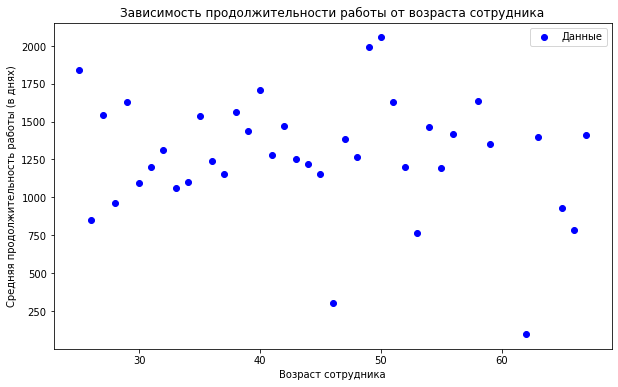

In [31]:
age_employment_data = df_age_employment
ages = age_employment_data['age']
avg_days_employed = age_employment_data['avg_days_employed']

plt.figure(figsize=(10, 6))
plt.scatter(ages, avg_days_employed, color='b', label='Данные')
plt.title('Зависимость продолжительности работы от возраста сотрудника')
plt.xlabel('Возраст сотрудника')
plt.ylabel('Средняя продолжительность работы (в днях)')
plt.legend()
plt.show()

In [32]:
correlation_coefficient, p_value = scipy.stats.pearsonr(ages, avg_days_employed)

print(f'Коэффициент корреляции Пирсона: {correlation_coefficient}')
print(f'p-значение: {p_value}')

Коэффициент корреляции Пирсона: -0.15280133877661647
p-значение: 0.35306189488945383


In [33]:
print(df_hr_dataset.columns)
print(df_production_staff.columns)
print(df_recruiting_costs.columns)
print(df_salary_grid.columns)

Index(['id', 'Employee Name', 'Employee Number', 'marriedid',
       'maritalstatusid', 'genderid', 'empstatus_id', 'deptid', 'perf_scoreid',
       'age', 'Pay Rate', 'state', 'zip', 'dob', 'sex', 'maritaldesc',
       'citizendesc', 'Hispanic/Latino', 'racedesc', 'Date of Hire',
       'Days Employed', 'Date of Termination', 'Reason For Term',
       'Employment Status', 'department', 'position', 'Manager Name',
       'Employee Source', 'Performance Score'],
      dtype='object')
Index(['id', 'Employee Name', 'Race Desc', 'Date of Hire', 'TermDate',
       'Reason for Term', 'Employment Status', 'Department', 'Position', 'Pay',
       'Manager Name', 'Performance Score', 'Abutments/Hour Wk 1',
       'Abutments/Hour Wk 2', 'Daily Error Rate', '90-day Complaints'],
      dtype='object')
Index(['id', 'Employment Source', 'January ', 'February', 'March', 'April',
       'May', 'June', 'July', 'August', 'September', 'October', 'November',
       'December', 'Total'],
      dtype='object

In [35]:
# Закрываем соединение
conn.close()

## Часть вторая

Перед вами стоит задача – подготовить аналитический ответ для SMM-отдела компании Skillbox. <br> Объектом анализа является  [паблик Skillbox Вконтакте](https://vk.com/skillbox_education). <br> <br>
Подключитесь к  API VK и выгрузите посты со стены паблика Skillbox за интересующий период (определите самостоятельно и обоснуйте). Проанализируйте влияние различных факторов (например, времени публикации) на вовлеченность пользователей (количество лайков, комментариев, голосов в опросах). Сделайте аналитику по рубрикам (примеры рубрик: дизайн-битва, игра по управлению), которые есть в паблике. Выбрать нужные посты можно с помощью регулярных выражений. Составьте перечень рекомандаций для SMM-отдела по итогам анализа. <br> <br>

Дополнительные инструкции по работе с API VK расположены [здесь](https://colab.research.google.com/drive/1rRaTay-OSPLAOX8V9UaFvTiAciVtp2s3).

In [56]:
import requests

def getjson(url):
    response = requests.get(url)
    response = response.json()
    return response

In [57]:
vk_token = ('vk1.a.0abjMbBT9P9gnQvNbOaDwD9o57H9DhCiPxVM40JLbMzCrgvuBPIjuZTI1jvgDzXAXlpA0SR0K7SJBXaDn0mhiUa_SJuH9BGjyNiFxZasc-eFODFZVWSq_O5e8s8zm7pl7DKzYDt8VrYMRuqX9ztJu-Kvy_Ikp3_DGE4_5IKMcNFHzyEPDNfxjsnHYbRy_cXx')
               
url = 'https://api.vk.com/method/account.getProfileInfo?access_token=' + str(vk_token) + '&v=5.92'
response = getjson(url)

print(response)

{'response': {'id': 231606991, 'home_town': 'Москва', 'status': 'inst: @ni.os.and 🍃', 'photo_200': 'https://sun1-54.userapi.com/s/v1/ig2/YW3tk6Ijk7zJTuGFliHhUBL9rwPuXh4aUkGgTaSbzDcx7cLtxImfL1fPUJF1AD_5tdWlimlRItnBJKHxCMPlW8Pb.jpg?size=200x200&quality=95&crop=0,174,526,526&ava=1', 'is_tinkoff_linked': True, 'is_tinkoff_verified': False, 'is_sber_verified': False, 'oauth_linked': ['esia', 'tinkoff_id'], 'oauth_verification': ['esia'], 'account_verification_profile': {'first_name': 'Никита', 'last_name': 'Осипов', 'sex': 2, 'middle_name': 'Андреевич', 'birthdate': '08.05.2003'}, 'verification_status': 'verified', 'promo_verifications': [], 'first_name': 'Никита', 'last_name': 'Осипов', 'bdate': '8.5.2003', 'bdate_visibility': 1, 'city': {'id': 1, 'title': 'Москва'}, 'country': {'id': 1, 'title': 'Россия'}, 'phone': '+7 *** *** ** 31', 'relation': 0, 'screen_name': 'niosand', 'sex': 2}}


In [63]:
from datetime import datetime

start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 12, 31)
start_time = int(start_date.timestamp())
end_time = int(end_date.timestamp())

url = 'https://api.vk.com/method/wall.get?access_token=' + str(vk_token) + '&owner_id=-66669811&count=100&v=5.92&start_time=' + str(start_time) + '&end_time=' + str(end_time)
response = getjson(url)


In [65]:
# Получение постов из паблика Skillbox за интересующий период:

In [64]:
for post in response['response']['items']:
    likes = post['likes']['count']
    comments = post['comments']['count']
    poll_votes = 0
    if 'poll' in post:
        poll_votes = sum([option['votes'] for option in post['poll']['options']])
    
    print(f'Пост ID: {post["id"]}, Лайков: {likes}, Комментариев: {comments}, Голосов в опросах: {poll_votes}')


Пост ID: 294781, Лайков: 8, Комментариев: 0, Голосов в опросах: 0
Пост ID: 294796, Лайков: 8, Комментариев: 0, Голосов в опросах: 0
Пост ID: 294794, Лайков: 2, Комментариев: 0, Голосов в опросах: 0
Пост ID: 294791, Лайков: 6, Комментариев: 0, Голосов в опросах: 0
Пост ID: 294789, Лайков: 4, Комментариев: 0, Голосов в опросах: 0
Пост ID: 294780, Лайков: 5, Комментариев: 3, Голосов в опросах: 0
Пост ID: 294777, Лайков: 28, Комментариев: 0, Голосов в опросах: 0
Пост ID: 294773, Лайков: 9, Комментариев: 0, Голосов в опросах: 0
Пост ID: 294769, Лайков: 19, Комментариев: 6, Голосов в опросах: 0
Пост ID: 294745, Лайков: 84, Комментариев: 23, Голосов в опросах: 0
Пост ID: 294744, Лайков: 9, Комментариев: 0, Голосов в опросах: 0
Пост ID: 294740, Лайков: 64, Комментариев: 0, Голосов в опросах: 0
Пост ID: 294732, Лайков: 9, Комментариев: 0, Голосов в опросах: 0
Пост ID: 294715, Лайков: 31, Комментариев: 4, Голосов в опросах: 0
Пост ID: 294714, Лайков: 9, Комментариев: 0, Голосов в опросах: 0
Пост

In [69]:
# Анализ рубрик:

In [74]:
import re

for post in response['response']['items']:
    text = post['text']
    hashtags = re.findall(r'#\w+', text)
    for hashtag in hashtags:
        if '#Skillbox_киноимузыка' in hashtag:
            print(f'Пост с хэштегом #Skillbox_киноимузыка: {post["id"]}')
        if '#ДайджестПоЧетвергам' in hashtag:
            print(f'Пост с хэштегом #ДайджестПоЧетвергам: {post["id"]}')

Пост с хэштегом #Skillbox_киноимузыка: 294794
Пост с хэштегом #ДайджестПоЧетвергам: 294789
Пост с хэштегом #Skillbox_киноимузыка: 294732
Пост с хэштегом #Skillbox_киноимузыка: 294714
Пост с хэштегом #ДайджестПоЧетвергам: 294566
Пост с хэштегом #Skillbox_киноимузыка: 294303
Пост с хэштегом #Skillbox_киноимузыка: 294172
Пост с хэштегом #Skillbox_киноимузыка: 294061
Пост с хэштегом #ДайджестПоЧетвергам: 294045
Пост с хэштегом #ДайджестПоЧетвергам: 293233
Пост с хэштегом #Skillbox_киноимузыка: 292823
